# Pendulum

A pendulum is composed of a lightweight rigid rod of length $R$ and a small-radius ball of mass $m$. The pendulum rotates about the origin at an angle $\theta$ defined with respect to the vertical.

![](pendulum.png)

<font size=-1>(image credit: Ruth Chabay and Bruce Sherwood)</font>

The translational angular momentum of the ball about the pivot $P$ is in the z direction (outward/inward) and has a magnitude

$$|\vec{L}_P| = mvR$$

The linear speed of the pendulum (ball) is related to its angular speed $\omega$ about point P.

$$v=R\omega$$

Substituting this into the angular momentum gives:

$$|\vec{L}_P| = mR^2\omega $$

Define the angular velocity vector to be in the same direction as the angular momentum $\vec{L}$. Then

$$L_{P,z} = mR^2\omega_z $$

where $\omega_z$ can be positive or negative, with positive defined outward and corresponds to counterclockwise rotation around P.

Apply the Angular Momentum Principle about the pivot. 

$$\tau_{P,z} = \frac{dL_{P,z}}{dt}$$

$$\tau_{P,z} = mR^2\frac{d\omega_{z}}{dt}$$

The torque is due to the gravitational force alone and is

$$\vec{\tau_{P}} = \vec{r} \times \vec{F}_{grav}$$

with a z-component equal to

$$\tau_{P,z} = -mgR\sin(\theta)$$

Substituting this into the Angular Momentum Principle gives

$$-mgR\sin(\theta) = mR^2\frac{d\omega_{z}}{dt}$$

We now have a differential equation for $\omega_z$:

$$\frac{d\omega_{z}}{dt} = -\frac{g}{R}\sin(\theta)$$

The angular velocity is the rate of change in the angle. This is our second ODE.

$$\omega_z = \frac{d\theta}{dt}$$



## Plan

The two differential equations above, along with the assumptions we made, are *our model*. Now, let's *model* it!

First, let's develop a plan.

- Our dependent variables are `theta` and `omega`.
- Use an array `data = [theta, omega]` to store the instantaneous values of `theta` and `omega`.
- Use an ODE function for calculating the value of ODEs at an instant. In this function, use an array `rate` to define the time-derivatives $\frac{d\theta}{dt}$ and $\frac{d\omega_{z}}{dt}$ for our ODEs. Thus in terms of variables this array would be something like:

```
rate[0] = omega
rate[1] = -g/R*np.sin(theta)
```

- The output will be:

  - graphs $\theta$ vs. $t$ and $\omega$ vs. $t$
  - VPython animation

- To accomplish this, we need arrays to store the values of `theta`, `t`, and `omega` at each time step.
- Reasonable sizes of variables in units of N, m, and s are: $g=10$ and $R=1$. 
- Reasonable initial conditions are: $\theta=\pi/2$ and $\omega=0$.
- A small time step is probably around 0.01 s if the period is a few seconds.

### Use your ODE library to solve the model

You can copy your `ode.py` file to the directory with this notebook. Or you can put all of your library files in `site-packages` in your python path. See [Wang's instructions](http://www.faculty.umassd.edu/j.wang/book/libs/libs.htm) for details.

In [3]:
#import ode #if you have ode.py in the same folder as your notebook
import ode
#import compy.ode as cp #if you followed Wang's instructions to put your library in site-packages
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import ode
import numpy as np
import matplotlib.pyplot as plt

def pendulum(d, tn):
    # d is an array of values of dependent variables
    # tn is the time at the beginning of this time step
    # return: an array of first-order ODEs corresponding to each variable
    
    rate = np.zeros(2) #shape must correspond to d
    rate[0] = d[1] # dtheta/dt = omega
    rate[1] = -g/R*np.sin(d[0]) # domega/dt = -g/R*np.sin(theta)
    
    return rate

g = 10
R = 1
theta0 = np.pi/2
omega0 = 0

data = np.array([theta0, omega0]) #initialize dependent variables

#dependent variable
t = 0
h = 0.01
Nsteps = int(5/h) #N steps for N seconds of evolution

#initialize arrays for storing data
tarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)

#store initial values at t = 0
tarr[0] = t
thetaarr[0] = data[0]
omegaarr[0] = data[1]

#iterate
for n in range(0,Nsteps-1):
    
    # update data
    data = cp.RK4(pendulum, data, t, h)
    
    # update time
    t = t + h
    
    #store values
    tarr[n+1] = t
    thetaarr[n+1] = data[0]
    omegaarr[n+1] = data[1]


NameError: name 'cp' is not defined

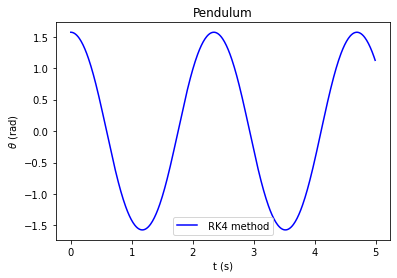

In [11]:
fig = plt.figure()
plt.title("Pendulum")
plt.plot(tarr,thetaarr, 'b-', label=' RK4 method')
plt.xlabel('t (s)')
plt.ylabel('$\\theta$ (rad)')
plt.legend()
plt.show()

## Use the model to make predictions

1. How can we verify the model?
2. What should we explore?